In [2]:
#Mitchell Schiworski, Dec 2018
#
#Inject a BBH signal into an array of 4 detectors at a time
#Detectors are L1,H1,V1 working at A+, with a third proposed HF detector at various locations
#Run sampler and see which location of HF detector has best sky localization.

import numpy as np
import bilby
import gwinc

11:21 bilby INFO    : Running bilby version: 0.3.3:
/home/mitchell/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#create BBH signal parameters
#-?-may need to create multiple signals
injection_parameters = dict( mass_1 = 36.0, mass_2 = 29.0, a_1 = 0.4, \
                            a_2 = 0.3, tilt_1 = 0.5, tilt_2 = 1.0, \
                            phi_12 = 1.7, phi_jl = 0.3, \
                            luminosity_distance = 2000, iota = 0.4, \
                            psi = 2.659, phase = 1.3, geocent_time = \
                            1126259642.413, ra = 1.375, dec = -1.2108)

#create waveform generator

duration = 4.0
sampling_frequency = 2048

waveform_arguments = dict(waveform_approximant = 'IMRPhenompv2',\
                          reference_frequency = 50.0, \
                          minimum_frequency = 20.0)

waveform_generator = bilby.gw.WaveformGenerator(duration=duration, \
                                sampling_frequency=sampling_frequency, \
                               frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,\
                               waveform_arguments=waveform_arguments)
                                                

In [5]:
#create list of detectors
#Assume H1,L1 & Virgo all operating at A+
#add a third high frequency detector of variable location, situated in Australia


#-?-check that H1,L1,V1 are of A+ sensitivity

#add existing detectors
ifos = bilby.gw.detector.InterferometerList(['H1','L1','V1'])

#create new detector

#-?-make the ifos list contain all possible new detector positions, and then iteratively sample using first 3 and
#-?-one of the new detectors


detector_length = 4
detector_min_freq = 10
detector_max_freq = 1000
detector_latitude = 23.6980 #-?-centre of Australia with zero elevation, just for example
detector_longitude = 133.8807
detector_elevation = 0.0
detector_Xarm_aximuth = 2.0 #-?-same as in bibly documentation example
detector_Yarm_aximuth = 125.0
frequencies = np.logspace(0,3,1000)
gwinc_detector = gwinc.load_ifo('A+') #-?-change this to be high frequency
gwinc_detector = gwinc.precompIFO(frequencies,gwinc_detector)
gwinc_noises = gwinc.noise_calc(frequencies,gwinc_detector)

newDetector_psd = gwinc_noises['Total']
#-?-probably don't need to redifine all detector variables again
newDetector = bilby.gw.detector.Interferometer( power_spectral_density = bilby.gw.detector.PowerSpectralDensity(frequency_array = frequencies,psd_array = newDetector_psd,),\
                                               name = 'New Detector', length = detector_length, \
                                               minimum_frequency = detector_min_freq, maximum_frequency = detector_max_freq,\
                                               latitude = detector_latitude,longitude = detector_longitude, \
                                               elevation = detector_elevation, xarm_azimuth = detector_Xarm_aximuth,\
                                               yarm_azimuth = detector_Yarm_aximuth)
                                               

ifos.append(newDetector)

In [6]:
#Inject the signal into the detectors

ifos.set_strain_data_from_power_spectral_densities( sampling_frequency = sampling_frequency, duration = duration,\
                                                  start_time = injection_parameters['geocent_time']-3)

ifos.inject_signal(waveform_generator = waveform_generator, parameters = injection_parameters)

/home/mitchell/anaconda3/lib/python3.6/site-packages/bilby/gw/detector.py:1834: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
11:21 bilby INFO    : Injected signal in H1:
11:21 bilby INFO    :   optimal SNR = 12.02
11:21 bilby INFO    :   matched filter SNR = 12.64
11:21 bilby INFO    :   mass_1 = 36.0
11:21 bilby INFO    :   mass_2 = 29.0
11:21 bilby INFO    :   a_1 = 0.4
11:21 bilby INFO    :   a_2 = 0.3
11:21 bilby INFO    :   tilt_1 = 0.5
11:21 bilby INFO    :   tilt_2 = 1.0
11:21 bilby INFO    :   phi_12 = 1.7
11:21 bilby INFO    :   phi_jl = 0.3
11:21 bilby INFO    :   luminosity_distance = 2000
11:21 bilby INFO    :   iota = 0.4
11:21 bilby INFO    :   psi = 2.659
11:21 bilby INFO    :   phase = 1.3
11:21 bilby INFO    :   geocent_time = 1126259642.413
11:21 bilby INFO    :   ra = 1.375
11:21 bilby INFO    :   dec = -1.2108
11:21 bilby INFO    : Injected signal in L1:

[{'plus': array([-0.-0.j, -0.-0.j, -0.-0.j, ..., -0.-0.j, -0.-0.j,
         -0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([-0.-0.j, -0.-0.j, -0.-0.j, ..., -0.-0.j, -0.-0.j,
         -0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([-0.-0.j, -0.-0.j, -0.-0.j, ..., -0.-0.j, -0.-0.j,
         -0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([-0.-0.j, -0.-0.j, -0.-0.j, ..., -0.-0.j, -0.-0.j,
         -0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [7]:
#Create Priors

priors = bilby.gw.prior.BBHPriorDict()
#for speed set all priors other than RA,Dec as delta-functions at the injected values #-?-maybe also mass_1/2

for parameter in ['mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'psi',
            'geocent_time', 'phase']:
    priors[parameter] = injection_parameters[parameter]
    
#Priors of other parameters will be set as the default values for BBH
print(priors)

11:22 bilby INFO    : No prior given, using default BBH priors in /home/mitchell/anaconda3/lib/python3.6/site-packages/bilby/gw/prior_files/binary_black_holes.prior.


BBHPriorDict([('mass_1', 36.0), ('mass_2', 29.0), ('a_1', 0.4), ('a_2', 0.3), ('tilt_1', 0.5), ('tilt_2', 1.0), ('phi_12', 1.7), ('phi_jl', 0.3), ('luminosity_distance', UniformComovingVolume(minimum=100.0, maximum=5000.0, name='luminosity_distance', latex_label='$d_L$', unit='Mpc')), ('dec', Cosine(name='dec', latex_label='$\\mathrm{DEC}$', unit=None, minimum=-1.5707963267948966, maximum=1.5707963267948966)), ('ra', Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None)), ('iota', Sine(name='iota', latex_label='$\\iota$', unit=None, minimum=0, maximum=3.141592653589793)), ('psi', 2.659), ('phase', 1.3), ('geocent_time', 1126259642.413)])


In [17]:
#Create Likelihood

likelihood=bilby.gw.likelihood.GravitationalWaveTransient( interferometers=ifos, waveform_generator=waveform_generator)

14:31 bilby WARNING : The waveform_generator start_time is not equal to that of the provided interferometers. Overwriting the waveform_generator.


In [21]:
#Run Sampler
sampler='dynesty'
nPoints=500
result = bilby.run_sampler(likelihood = likelihood, priors = priors, sampler=sampler, nPoints=nPoints,\
                           injection_parameters = injection_parameters)

15:41 bilby INFO    : Search parameters:
15:41 bilby INFO    :   luminosity_distance = UniformComovingVolume(minimum=100.0, maximum=5000.0, name='luminosity_distance', latex_label='$d_L$', unit='Mpc')
15:41 bilby INFO    :   dec = Cosine(name='dec', latex_label='$\\mathrm{DEC}$', unit=None, minimum=-1.5707963267948966, maximum=1.5707963267948966)
15:41 bilby INFO    :   ra = Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None)
15:41 bilby INFO    :   iota = Sine(name='iota', latex_label='$\\iota$', unit=None, minimum=0, maximum=3.141592653589793)
15:41 bilby INFO    :   mass_1 = 36.0
15:41 bilby INFO    :   mass_2 = 29.0
15:41 bilby INFO    :   a_1 = 0.4
15:41 bilby INFO    :   a_2 = 0.3
15:41 bilby INFO    :   tilt_1 = 0.5
15:41 bilby INFO    :   tilt_2 = 1.0
15:41 bilby INFO    :   phi_12 = 1.7
15:41 bilby INFO    :   phi_jl = 0.3
15:41 bilby INFO    :   psi = 2.659
15:41 bilby INFO    :   phase = 1.3
15:41 bilby INFO    :   geocent_time =

15:57 bilby INFO    : Sampling time: 0:16:11.382560
15:57 bilby INFO    : Results saved to outdir/
15:57 bilby INFO    : Summary of results:
nsamples: 10402
log_noise_evidence: -16372.300
log_evidence: -15991.881 +/-  0.179
log_bayes_factor: 380.419 +/-  0.179



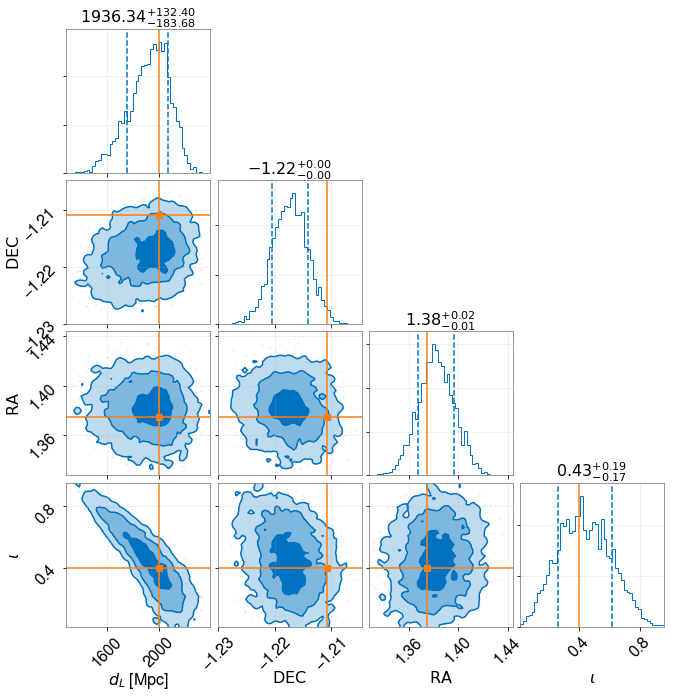

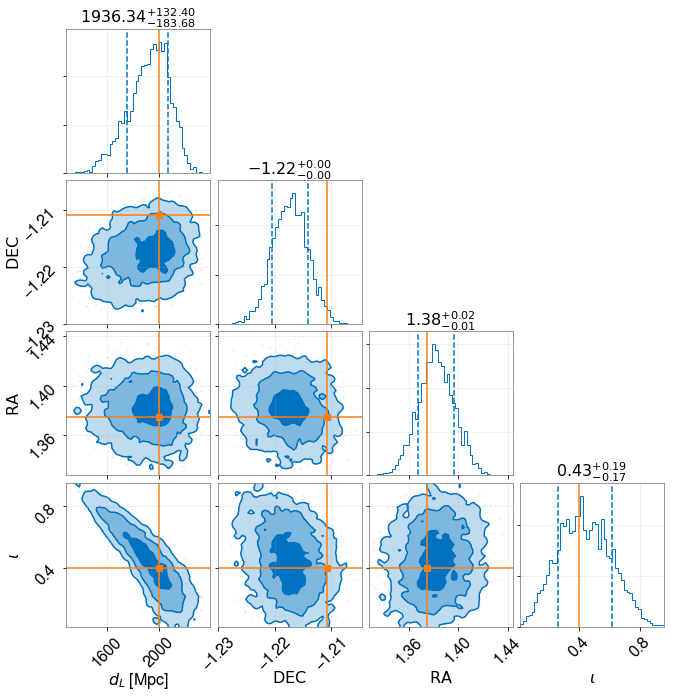

In [22]:
#Create corner plot
result.plot_corner()